# Exploration

this notebook lists the amount of training and validation data available and plots sample data from all 4 classes.

The cell bellow installs required dependencies if not already installed

In [7]:
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib

The cell bellow lists the amount of data files available for each set and class

In [1]:
import os

training_dir = os.path.join('..', 'data', 'training')

print("Number of files per class (training) \n")
for Class in ['normal', 'af', 'other', 'noisy']:
    class_dir = os.path.join(training_dir, Class)
    print(f"{Class}: {len([os.path.join(class_dir, _) for _ in os.listdir(class_dir) if _.endswith('.mat')])}")

training_dir = os.path.join('..', 'data', 'validation')

print("\nNumber of files per class (validation) \n")
for Class in ['normal', 'af', 'other', 'noisy']:
    class_dir = os.path.join(training_dir, Class)
    print(f"{Class}: {len([os.path.join(class_dir, _) for _ in os.listdir(class_dir) if _.endswith('.mat')])}")


Number of files per class (training) 

normal: 5050
af: 738
other: 2456
noisy: 284

Number of files per class (validation) 

normal: 150
af: 50
other: 70
noisy: 30


The cell bellow plots sample data from all 4 data classses

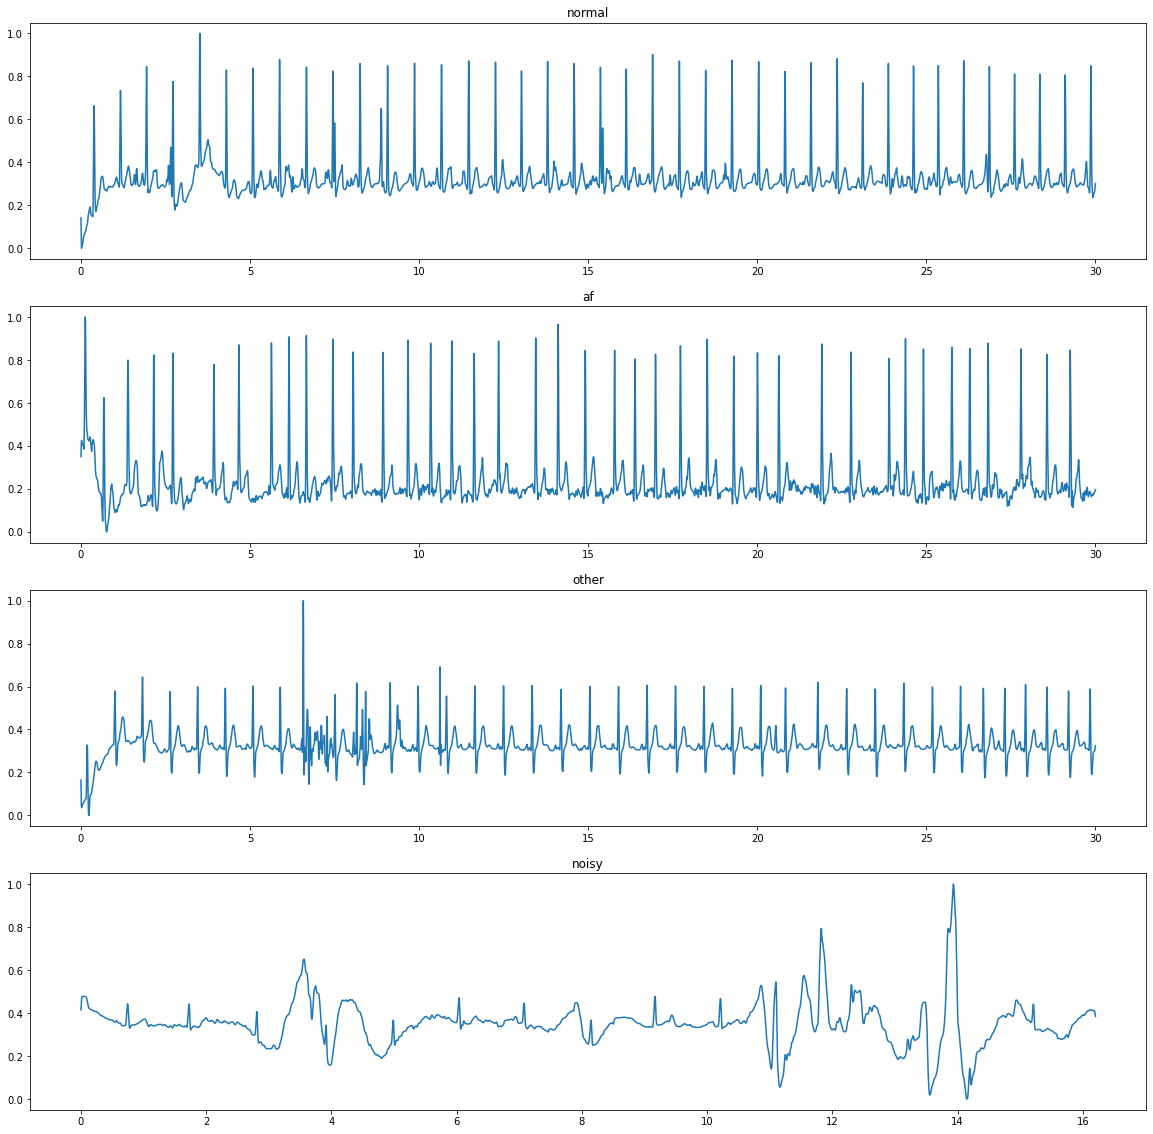

In [3]:
import sys
import scipy.io
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sampling_freq = 300
training_dir = os.path.join('..', 'data', 'training')

normal_dir = os.path.join(training_dir, 'normal')
af_dir = os.path.join(training_dir, 'af')
other_dir = os.path.join(training_dir, 'other')
noisy_dir = os.path.join(training_dir, 'noisy')

fig, axs = plt.subplots(4)
fig.set_size_inches(20, 20)
dirs = [normal_dir, af_dir, other_dir, noisy_dir]
titles = ['normal', 'af', 'other', 'noisy']

for i in range(len(dirs)):
    file = ''
    for f in os.listdir(dirs[i]):
        if f.endswith(".mat"):
            file = os.path.join(dirs[i], f)
            break
    
    mat_data = scipy.io.loadmat(file)
    sequence = mat_data['val'][0]
    sequence = (sequence - min(sequence)) / (max(sequence) - min(sequence))
    time = np.linspace(0, len(sequence) / sampling_freq, len(sequence))

    axs[i].plot(time, sequence)
    axs[i].title.set_text(titles[i])